<a href="https://colab.research.google.com/github/paolomartine/Kaggle-udea-20251-Pruebas--saber-pro/blob/main/99_modelo_soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paolostevan","key":"692d3546fa778e9c51b858a4a1f7767a"}'}

In [ ]:
from google.colab import files
import zipfile

# Subir archivo
uploaded = files.upload()

# Descomprimir el archivo ZIP
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content')

Saving udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip to udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip


In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [ ]:
import pandas as pd
import numpy as np

# Cargar datos
data = pd.read_csv('train.csv')
print ("shape of loaded dataframe", data.shape)

shape of loaded dataframe (692500, 21)


In [ ]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
sum(data.FAMI_EDUCACIONPADRE.isna()), sum(data.FAMI_ESTRATOVIVIENDA.isna())

(23178, 32137)

In [ ]:
data = data[['FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']]

data.head()

,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,Técnica o tecnológica incompleta,Estrato 3,medio-alto
1,Técnica o tecnológica completa,Estrato 3,bajo
2,Secundaria (Bachillerato) completa,Estrato 3,bajo
3,No sabe,Estrato 4,alto
4,Primaria completa,Estrato 3,medio-bajo


<Axes: xlabel='FAMI_EDUCACIONPADRE'>

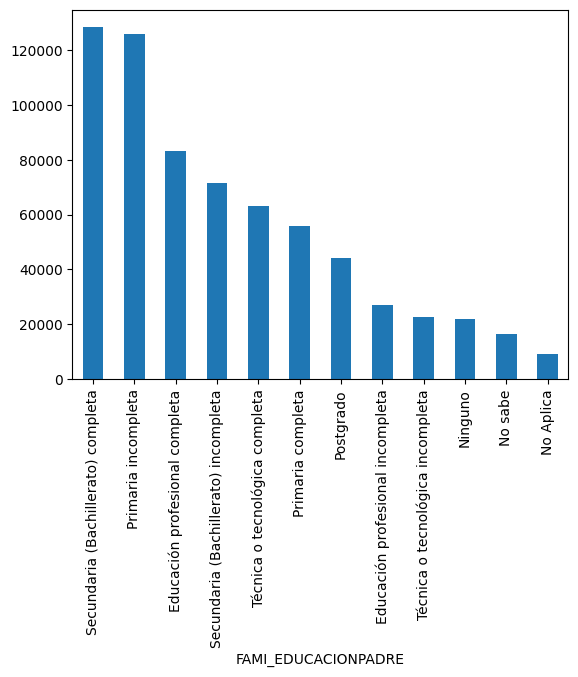

In [ ]:
data.FAMI_EDUCACIONPADRE.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

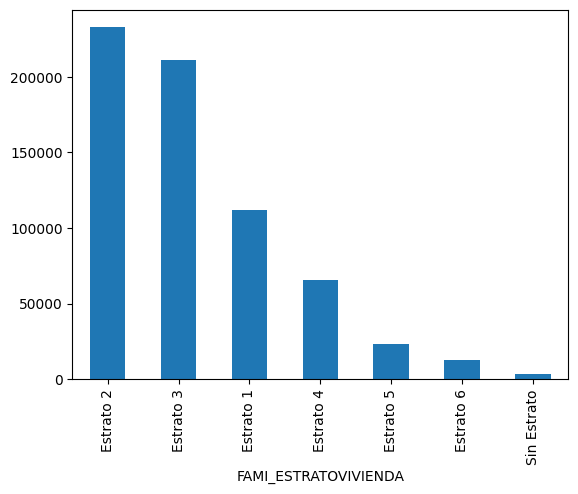

In [ ]:
data.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

In [ ]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=a421b679458a3d50883fadfdae67cdb5f81061a60e5a1c0fe5475997dd92f3dd
  Stored in directory: /root/.cache/pip/wheels/1d/99/c0/f49a3db4e38f121da6a422c352a7ff70baf2cc21c25b851a6c
Successfully built rlxutils


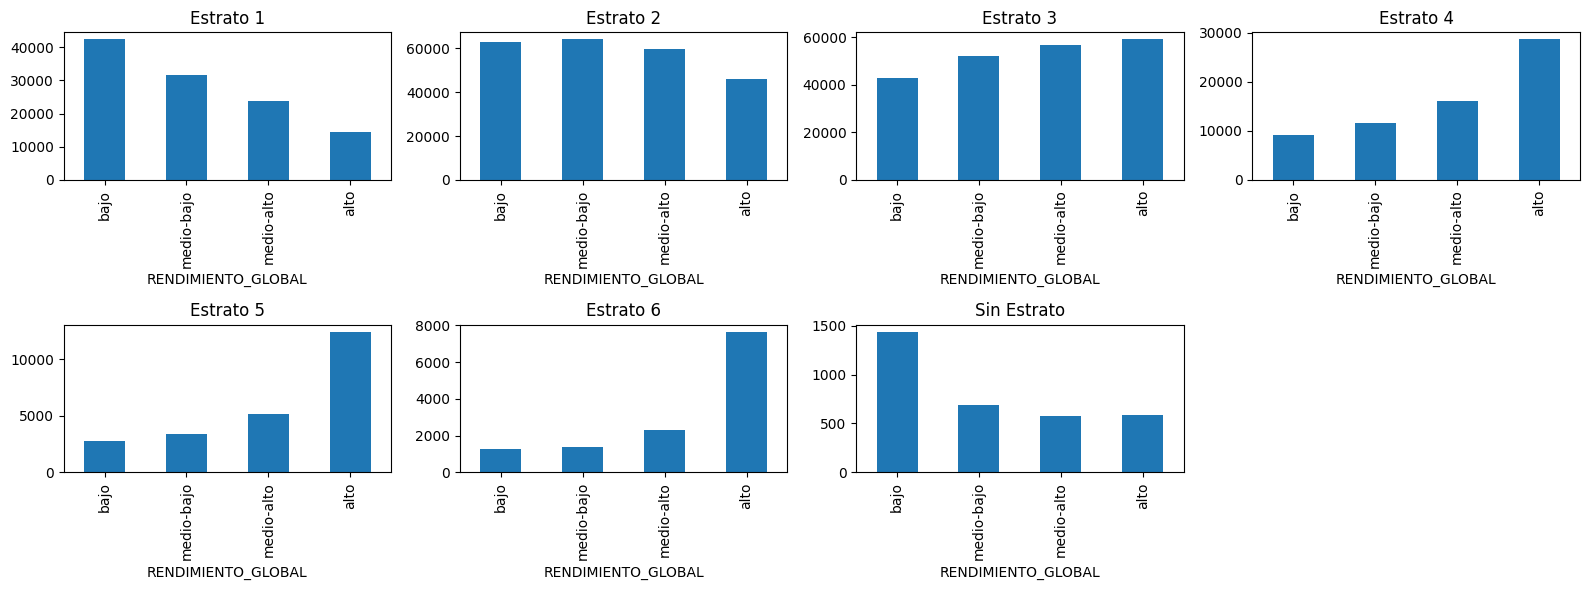

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(data.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    datac = data[data.FAMI_ESTRATOVIVIENDA==ci]
    datac.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

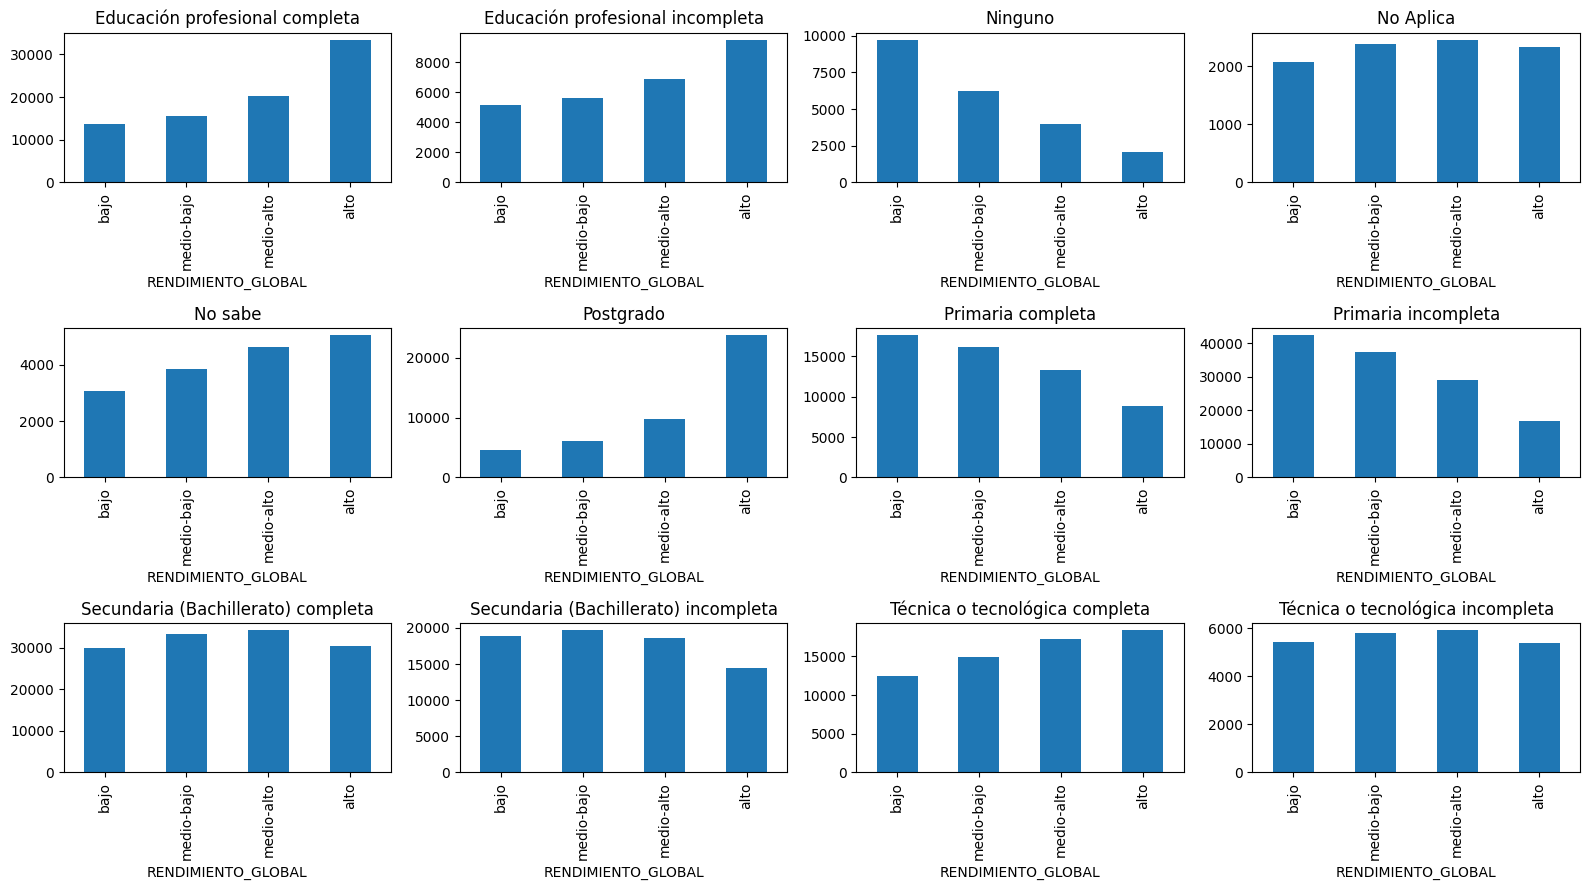

In [ ]:
c = sorted(data.FAMI_EDUCACIONPADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    datac = data[data.FAMI_EDUCACIONPADRE==ci]
    datac.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

In [ ]:
sum(data.FAMI_EDUCACIONPADRE.isna()), sum(data.FAMI_ESTRATOVIVIENDA.isna())

(23178, 32137)

In [ ]:
data.FAMI_EDUCACIONPADRE.values[data.FAMI_EDUCACIONPADRE.isna()] = 'no info'
data.FAMI_ESTRATOVIVIENDA.values[data.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
sum(data.FAMI_EDUCACIONPADRE.isna()), sum(data.FAMI_ESTRATOVIVIENDA.isna())

(0, 0)

In [ ]:
data.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
no info,32137
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [ ]:
cmap = {'Estrato 1': 0.25,
 'Estrato 2': 0.5,
 'Estrato 3': 0.75,
 'Estrato 4': 1,
 'Estrato 5': 1.25,
 'Estrato 6': 1.5,
 'Sin Estrato': 0,
 'no info': -1}

data.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in data.FAMI_ESTRATOVIVIENDA]]
data.FAMI_ESTRATOVIVIENDA.value_counts()

,count
FAMI_ESTRATOVIVIENDA,
0.50,232671
0.75,210685
0.25,111991
1.00,65514
-1.00,32137
1.25,23608
1.50,12605
0.00,3289


In [ ]:
data = data.copy()
data.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in data.FAMI_EDUCACIONPADRE.values]

In [ ]:
data.FAMI_EDUCACIONPADRE.value_counts()

,count
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,128289
Primaria incompleta,125675
Educación profesional completa,83117
Secundaria (Bachillerato) incompleta,71654
Técnica o tecnológica completa,62995
Primaria completa,55958
no info,48999
Postgrado,44169
Educación profesional incompleta,27084


<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

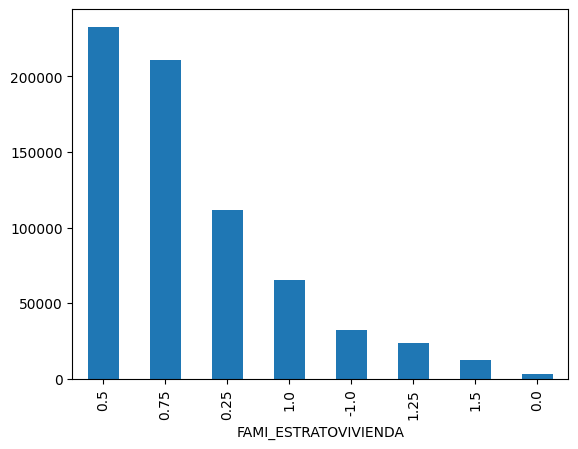

In [ ]:
data.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

In [ ]:
x = data.FAMI_EDUCACIONPADRE.values
FAMI_EDUCACIONPADRE_vals = sorted(np.unique(x))
FAMI_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(FAMI_EDUCACIONPADRE_vals))[i] for i,val in enumerate(FAMI_EDUCACIONPADRE_vals)}
FAMI_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in data.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import pandas as pd
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
FAMI_EDUCACIONPADRE_df

,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = pd.concat([FAMI_EDUCACIONPADRE_df, data], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
data.shape

(692500, 13)

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
data[y_col] = [rmap[i] for i in data[y_col]]
data.head()

,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.75,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,3
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,1


In [ ]:
data = data[sorted(data.columns)]

X = data[[c for c in data.columns if c!=y_col]].values
y = data[y_col].values
X.shape, y.shape

((692500, 12), (692500,))

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape


((554000, 12), (138500, 12), (554000,), (138500,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear modelo Random Forest con profundidad máxima de 5
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(Xtr, ytr)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
preds_tr = rf.predict(Xtr)
preds_ts = rf.predict(Xts)

In [ ]:
print (preds_tr[:10])
print (preds_ts[:10])

[2 3 0 3 0 0 3 3 3 2]
[2 2 1 3 0 2 3 3 1 0]


In [ ]:
from sklearn.metrics import accuracy_score

acc_tr = accuracy_score(ytr, preds_tr)
acc_ts = accuracy_score(yts, preds_ts)

print(f"Accuracy en entrenamiento: {acc_tr:.5f}")
print(f"Accuracy en test: {acc_ts:.5f}")

Accuracy en entrenamiento: 0.34404
Accuracy en test: 0.34658


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Crear y entrenar modelo Random Forest con max_depth = 5
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(Xtr, ytr)

# Predicciones
y_pred = rf.predict(Xts)

# Evaluación
accuracy = accuracy_score(yts, y_pred)
cm = confusion_matrix(yts, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Matriz de confusión:")
print(cm)


Accuracy: 0.35
Matriz de confusión:
[[17634  6744  4231  5925]
 [14327  7375  5385  7456]
 [11360  6929  5986 10143]
 [ 7440  5145  5414 17006]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Calcular matrices de confusión
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar por clase (por fila)
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1, 1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1, 1)

print("Matriz de confusión normalizada (entrenamiento):")
print(cm_tr)

print("\nMatriz de confusión normalizada (test):")
print(cm_ts)


Matriz de confusión normalizada (entrenamiento):
[[0.50600565 0.19603764 0.1256383  0.1723184 ]
 [0.41349142 0.2135161  0.15570093 0.21729155]
 [0.3318416  0.20067638 0.17038506 0.29709696]
 [0.21446655 0.14645768 0.15722474 0.48185102]]

Matriz de confusión normalizada (test):
[[0.51062721 0.19528581 0.12251694 0.17157005]
 [0.41475842 0.21350201 0.15589266 0.21584692]
 [0.33005985 0.20131908 0.17392062 0.29470045]
 [0.21254107 0.146979   0.15466362 0.48581631]]


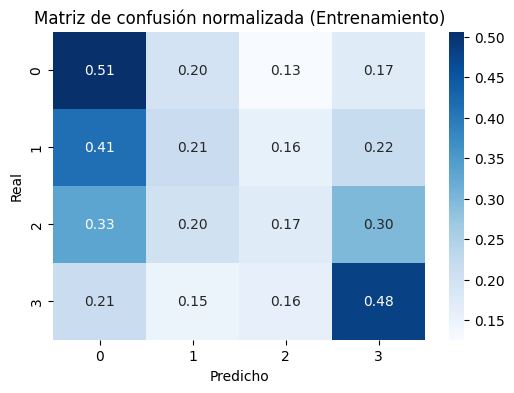

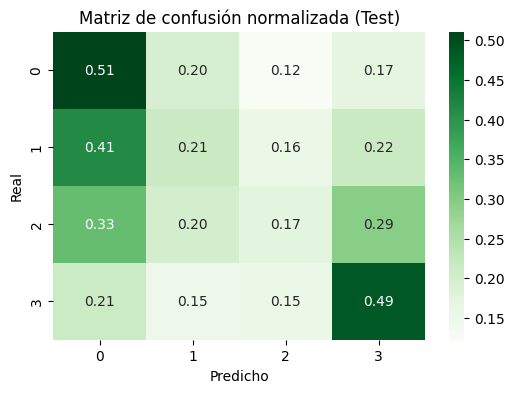

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calcular matrices de confusión
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar por clase (por fila)
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1, 1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1, 1)

# Graficar heatmap - entrenamiento
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de confusión normalizada (Entrenamiento)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Graficar heatmap - test
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ts, annot=True, cmap='Greens', fmt=".2f")
plt.title("Matriz de confusión normalizada (Test)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [ ]:
datah = data[['FAMI_ESTRATOVIVIENDA', y_col]]

X = datah[[c for c in datah.columns if c!=y_col]].values
y = datah[y_col].values
X.shape, y.shape

((692500, 1), (692500,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separar los datos (80% entrenamiento, 20% test)
Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=0.8, random_state=42)

# Crear y entrenar el modelo Random Forest con max_depth = 5
rf_small = RandomForestClassifier(max_depth=5, random_state=42)
rf_small.fit(Xtr, ytr)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
import numpy as np

# Predicciones con el modelo Random Forest
preds_tr = rf_small.predict(Xtr)
preds_ts = rf_small.predict(Xts)

# Cálculo de accuracy para entrenamiento y test
train_acc = np.mean(preds_tr == ytr)
test_acc = np.mean(preds_ts == yts)

print(f"Accuracy en entrenamiento: {train_acc:.2f}")
print(f"Accuracy en test: {test_acc:.2f}")


Accuracy en entrenamiento: 0.33
Accuracy en test: 0.33


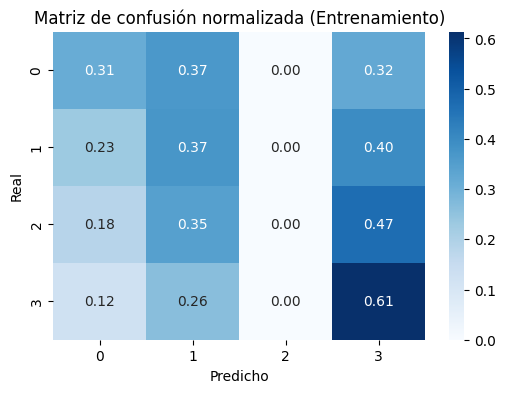

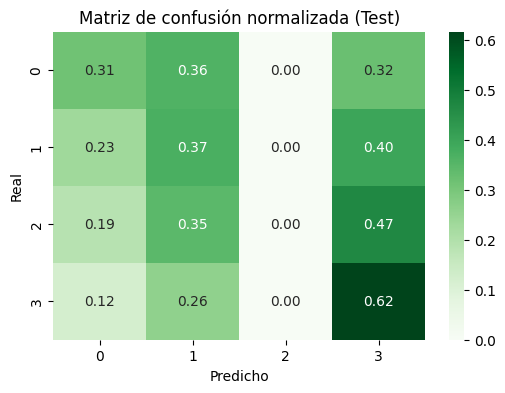

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matrices de confusión
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar por clase
cm_tr = cm_tr / cm_tr.sum(axis=1, keepdims=True)
cm_ts = cm_ts / cm_ts.sum(axis=1, keepdims=True)

# Heatmap - entrenamiento
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de confusión normalizada (Entrenamiento)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Heatmap - test
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ts, annot=True, cmap='Greens', fmt=".2f")
plt.title("Matriz de confusión normalizada (Test)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [ ]:
zt = pd.read_csv("test.csv")
zt

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260


In [ ]:
zt_ids = zt['ID'].values
zt = zt[['FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA']]
print ("shape of loaded dataframe", zt.shape)
zt.head()

shape of loaded dataframe (296786, 2)


,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA
0,Técnica o tecnológica completa,Estrato 3
1,Secundaria (Bachillerato) completa,Estrato 2
2,Secundaria (Bachillerato) incompleta,Estrato 3
3,Primaria incompleta,Estrato 1
4,Secundaria (Bachillerato) completa,Estrato 2


In [ ]:
zt.FAMI_EDUCACIONPADRE.values[zt.FAMI_EDUCACIONPADRE.isna()] = 'no info'
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'

In [ ]:
zt = zt.copy()
zt.FAMI_ESTRATOVIVIENDA = np.r_[[cmap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]

In [ ]:
zt.FAMI_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.FAMI_EDUCACIONPADRE.values]
FAMI_EDUCACIONPADRE_onehot_enc = np.r_[[FAMI_EDUCACIONPADRE_onehot_vals[i] for i in zt.FAMI_EDUCACIONPADRE]]
FAMI_EDUCACIONPADRE_df = pd.DataFrame(FAMI_EDUCACIONPADRE_onehot_enc, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in FAMI_EDUCACIONPADRE_onehot_vals])
zt = pd.concat([FAMI_EDUCACIONPADRE_df, zt], axis=1).drop('FAMI_EDUCACIONPADRE', axis=1)
zt.shape

(296786, 12)

In [ ]:
zt

,FAMI_EDUCACIONPADRE__Educación profesional completa,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info,FAMI_ESTRATOVIVIENDA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.50
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.75
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.25
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.25
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
296783,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.75
296784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75


In [ ]:
X = data[[c for c in data.columns if c != y_col]]
y = data[y_col]


In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=0.8, random_state=42)

# Entrenás normalmente
rf_small = RandomForestClassifier(max_depth=5, random_state=42)
rf_small.fit(Xtr, ytr)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Asegurarte de que zt tenga las mismas columnas
missing_cols = set(Xtr.columns) - set(zt.columns)
for col in missing_cols:
    zt[col] = 0

zt = zt[Xtr.columns]  # mismo orden

# Hacer predicciones
preds_test_data = rf_small.predict(zt)


In [ ]:
# Invertir el diccionario original
rmapi = {v: k for k, v in rmap.items()}

# Convertir predicciones numéricas a etiquetas de texto
text_preds_test_data = [rmapi[i] for i in preds_test_data]

# Mostrar algunas predicciones
print(text_preds_test_data[:10])


['alto', 'medio-bajo', 'medio-alto', 'bajo', 'medio-bajo', 'bajo', 'medio-bajo', 'alto', 'medio-bajo', 'medio-alto']


In [ ]:
submission = pd.DataFrame({
    'ID': zt_ids,
    'RENDIMIENTO_GLOBAL': text_preds_test_data
})


In [ ]:
submission.to_csv('predicciones_finales.csv', index=False)


In [ ]:
# save to file ready to submit
submission.to_csv("my_submission.csv", index=False)

In [ ]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-bajo
499179,medio-alto
782980,bajo
785185,medio-bajo
58495,bajo
705444,medio-bajo
557548,alto
519909,medio-bajo


In [ ]:
submission.shape

(296786, 2)

In [ ]:
# 1. Subí el archivo
from google.colab import files
files.upload()  # seleccioná tu archivo kaggle.json


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"paolostevan","key":"692d3546fa778e9c51b858a4a1f7767a"}'}

In [ ]:
# 2. Crear el directorio correcto y moverlo allí
!mkdir -p /root/.config/kaggle
!mv kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json


In [ ]:
!ls /root/.config/kaggle/


kaggle.json


In [ ]:

!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f my_submission.csv -m "Paolo Martinez submission with Random forest"

100% 3.95M/3.95M [00:00<00:00, 5.76MB/s]
Successfully submitted to UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia

In [ ]:
!kaggle competitions submissions -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


fileName           date                        description                                   status                     publicScore  privateScore  
-----------------  --------------------------  --------------------------------------------  -------------------------  -----------  ------------  
my_submission.csv  2025-04-14 20:41:53.157000  Paolo Martinez submission with Random forest  SubmissionStatus.COMPLETE  0.34601                    
